# Generation of synthetic imaged using copypaste data augmentation

In [1]:
# switch to the project directory
import os
os.chdir('/home/p22g5/AnomaliesRecycling/')
print("Current working directory: {0}".format(os.getcwd()))

Current working directory: /home/p22g5/AnomaliesRecycling


In [2]:
from data_augmentation.data_augmentation import DataAugmentation
dataAugm = DataAugmentation(
    data_dir="data/",
    zero_lid_dir='data_augmentation/data/zero_lid.csv',
    one_lid_dir='data_augmentation/data/one_lid.csv'
)


## Generation of the heatmap of lid objects

Generating and saving masks for images


100%|███████████████████████████████████████████████████████████| 1072/1072 [00:34<00:00, 31.23it/s]


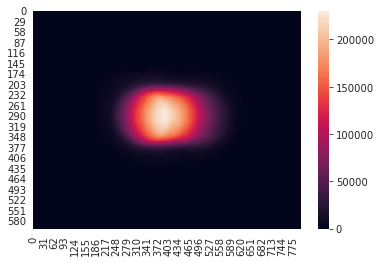

In [3]:
dataAugm.extract_masks()
summed_mask = dataAugm.get_sum_binary_mask()

## Generation of the percentiled binary mask
Use it for the center of the inserted objects

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

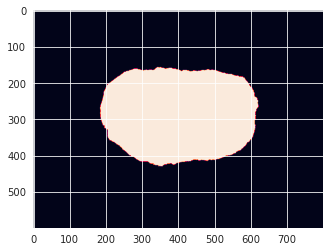

In [4]:
dataAugm.get_percentile_sum_binary_mask(summed_mask=summed_mask, percentile=80)

## Test copypaste method on one image

In [5]:
from PIL import Image
import cv2
from IPython.display import display
def show_cv(img_in):
    img = cv2.cvtColor(img_in, cv2.COLOR_BGR2RGB) # Converting BGR to RGB
    display(Image.fromarray(img))

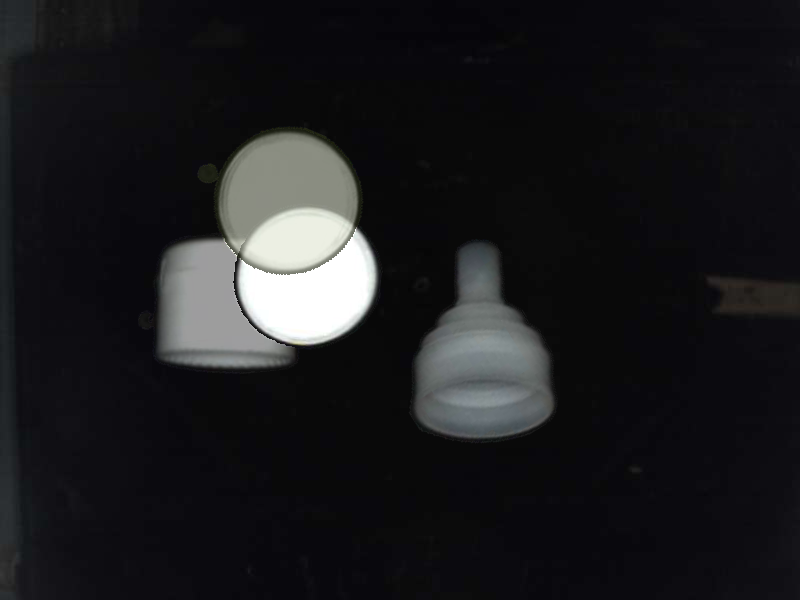

In [7]:
img, _ , _= dataAugm.copy_and_paste(label=4, rotate=True, change_color=True, make_dark=False, transparent=True)
show_cv(img)

## Generation of the synthesized image of required classes

In [8]:
dataAugm.generate({0: 2000,
                   1: 2000,
                   2: 2000,
                   3: 2000,
                   4: 2000,
                   5: 2000,
                   }, rotate=True, change_color=True, make_dark=True, transparent=True, coco_annotation=True,  data_dir_name='train')

Generate images:


100%|█████████████████████████████████████████████████████████| 12000/12000 [17:12<00:00, 11.63it/s]


Create coco annotation:


  1%|▌                                                        | 297/30000 [01:02<1:35:51,  5.16it/s]/home/p22g5/anaconda3/envs/recycling2/lib/python3.9/site-packages/scipy/interpolate/_fitpack_impl.py:300: RuntimeWarning: The maximal number of iterations (20) allowed for finding smoothing
spline with fp=s has been reached. Probable cause: s too small.
(abs(fp-s)/s>0.001)
  warnings.warn(RuntimeWarning(_iermess[ier][0]))
 35%|███████████████████                                    | 10412/30000 [35:44<1:01:08,  5.34it/s]/home/p22g5/anaconda3/envs/recycling2/lib/python3.9/site-packages/scipy/interpolate/_fitpack_impl.py:300: RuntimeWarning: A theoretically impossible result when finding a smoothing spline
with fp = s. Probable cause: s too small. (abs(fp-s)/s>0.001)
  warnings.warn(RuntimeWarning(_iermess[ier][0]))
100%|███████████████████████████████████████████████████████| 30000/30000 [1:42:38<00:00,  4.87it/s]


In [9]:
dataAugm.generate({0: 400,
                   1: 400,
                   2: 400,
                   3: 400,
                   4: 400,
                   5: 400,
                   }, rotate=True, change_color=True, make_dark=True, transparent=True, coco_annotation=True,  data_dir_name='test')

Generate images:


100%|███████████████████████████████████████████████████████████| 2400/2400 [03:23<00:00, 11.79it/s]


Create coco annotation:


  2%|█                                                           | 112/6000 [00:20<14:18,  6.86it/s]/home/p22g5/anaconda3/envs/recycling2/lib/python3.9/site-packages/scipy/interpolate/_fitpack_impl.py:300: RuntimeWarning: The maximal number of iterations (20) allowed for finding smoothing
spline with fp=s has been reached. Probable cause: s too small.
(abs(fp-s)/s>0.001)
  warnings.warn(RuntimeWarning(_iermess[ier][0]))
 28%|████████████████▍                                          | 1666/6000 [05:18<14:11,  5.09it/s]/home/p22g5/anaconda3/envs/recycling2/lib/python3.9/site-packages/scipy/interpolate/_fitpack_impl.py:300: RuntimeWarning: A theoretically impossible result when finding a smoothing spline
with fp = s. Probable cause: s too small. (abs(fp-s)/s>0.001)
  warnings.warn(RuntimeWarning(_iermess[ier][0]))
100%|███████████████████████████████████████████████████████████| 6000/6000 [19:21<00:00,  5.17it/s]
